# Initialiazation Packages

In [2]:
#using Pkg; Pkg.build("PyCall")
#using Pkg; Pkg.build("PyPlot")
#using PyCall
#PyCall.python
using PyCall
using PyPlot

In [3]:
using LinearAlgebra
using LaTeXStrings
using QuantumToolbox
using DelimitedFiles, NLsolve
using Random, Distributions, Dates, Polynomials, StatsBase 
using JLD

In [4]:
#using Pkg
#Pkg.activate("..")

include("../src/Classical_open_2KPOs_functions.jl")
using .Classical_open_KPOs

include("../src/Classical_2KPOs_functions.jl")
import .Classical_KPOs: Weighted_initial_conditions

## Lyapunov exponent of the classical trajectories of the open system

We know that the interaction with the enviroment is going to decrease the Lyapunov of the classical trajectories. The idea is to initialize the trajectories with the same energy as the closed system (x - axis) and calculate the new Lyapunov exponent (y-axis) but now evolved by the open system. 

In [ ]:
#KPOs parameters
p = Δ1, K1, ξ11, ξ21, Δ2, K2, ξ12, ξ22, γ, κ1, κ2 = 0., 1., 0., 5., 0., 1., 0., 5., 1.0, 0.025, 0.025;
min_ics = 10

(0.0, 1.0, 0.0, 5.0, 0.0, 1.0, 0.0, 5.0, 1.0)

Generating ICs from Closed system sweeping Energy

In [31]:
E = 0
ICs, ωs = Classical_KPOs.Weighted_initial_conditions(E, p[1:9], -13., 13., min_ics=min_ics)
println("Initial conditions with Energy $(E)")
display(ICs[1:10])

Initial conditions with Energy 0


10-element Vector{Vector{Float64}}:
 [3.092685945194077, 0.18473385897180172, -1.2639385584843126, -2.0156709109445985]
 [3.092685945194077, 0.18473385897180172, -1.2639385584843126, 2.039191666876908]
 [2.4962193634341467, 0.911844906447353, -1.908749326589902, -1.7443483465653975]
 [2.4962193634341467, 0.911844906447353, -1.908749326589902, 1.852384514414001]
 [-1.4242160727081696, -0.04722361725610824, 1.3291882948918268, -1.5387963717496693]
 [-1.4242160727081696, -0.04722361725610824, 1.3291882948918268, 1.5321095429115028]
 [0.003369433336146699, -1.228751077461924, -2.0886718914938847, -1.1739201165419675]
 [0.003369433336146699, -1.228751077461924, -2.0886718914938847, 1.0160619442052983]
 [-1.0135448429314025, -1.917719207927199, -3.75714777301312, -0.7715141464137673]
 [-1.0135448429314025, -1.917719207927199, -3.75714777301312, 0.6156227512284971]

Calcualting the Lyapunov Exponent for the ICs

In [39]:
N = Int(2e5) #number of time steps for the Lyapunov calculation
Δt = 1e-3 #smallest time inteval for the Lapunov calculation
err= 1e-3 #tolerance for the Lyapunov calculation
λs = zeros(length(ICs))

for i in 1:length(ICs)
    λ_max  = Classical_open_KPOs.Lyapunov_max(ICs[i], p, N, Δt, err)
    println("Lyapunov exponent for IC $(i): $(λ_max)")
    λs[i] = λ_max
end

Lyapunov exponent for IC 1: -0.009976679343292511
Lyapunov exponent for IC 2: 0.004035680790876333
Lyapunov exponent for IC 3: -0.01019118542164367
Lyapunov exponent for IC 4: -0.010308704840437858
Lyapunov exponent for IC 5: -0.00949088915412284
Lyapunov exponent for IC 6: -0.009401743999413781
Lyapunov exponent for IC 7: -0.009034420136088574
Lyapunov exponent for IC 8: -0.009291099676296051
Lyapunov exponent for IC 9: -0.009500029315079199
Lyapunov exponent for IC 10: -0.008192530994529044


### HPC results

#### Treating data from Slurm

In [ ]:
#Treating data 
Δ1, K1, ξ11, ξ21, Δ2, K2, ξ12, ξ22, κ1, κ2 =  0., 1., 0., 5., 0., 1., 0., 5., 0.025, 0.025;
ps = [0.1, 1., 5.]
ICs = 100

#roots, cE, λs_p31, s_λ = crit_energies(p);
n_E = 300
#Es1 = range(cE[1],600+cE[1], length=n_E)
#println( cE[1] )
#Energies = Es1 .- cE[1] 

#Non-existing data
λs = [Float64[] for i in 1:n_E]
#existing data
#λs = load("../data/Lyapunov_open/Lyapunov_Energies_$(p)_ICs_$(ICs)_open.jld")["λs"] 

data_miss= []
j=3
p = Δ1, K1, ξ11, ξ21, Δ2, K2, ξ12, ξ22, ps[j], κ1, κ2;
for job in 1:12
    try
        λs[(25*(job-1) + 1):25*job] = load("../data/Lyapunov_open/Lyapunov_Energies_$(p)_job_$(job)_ICs_$(ICs)_open.jld")["λs"][(25*(job-1) + 1):25*job]
    catch
        #println("Missing job $(job)")
        push!(data_miss, job)
    end    
end
println("γ = $(ps[j])")
println("data_miss = $(data_miss)")
#Just uncomment to save data
#save("../data/Lyapunov_open/Lyapunov_Energies_$(p)_ICs_$(ICs)_open.jld", "λs", λs) 

#testing
#λs = load("../data/Lyapunov_open/Lyapunov_Energies_$(p)_ICs_$(ICs)_open.jld")["λs"] 

γ = 5.0
data_miss = Any[]


### Plotting HPC data

-51.00492109374969
γ = 0.1
-60.49991406249748
γ = 1.0
-112.49988281248473
γ = 5.0


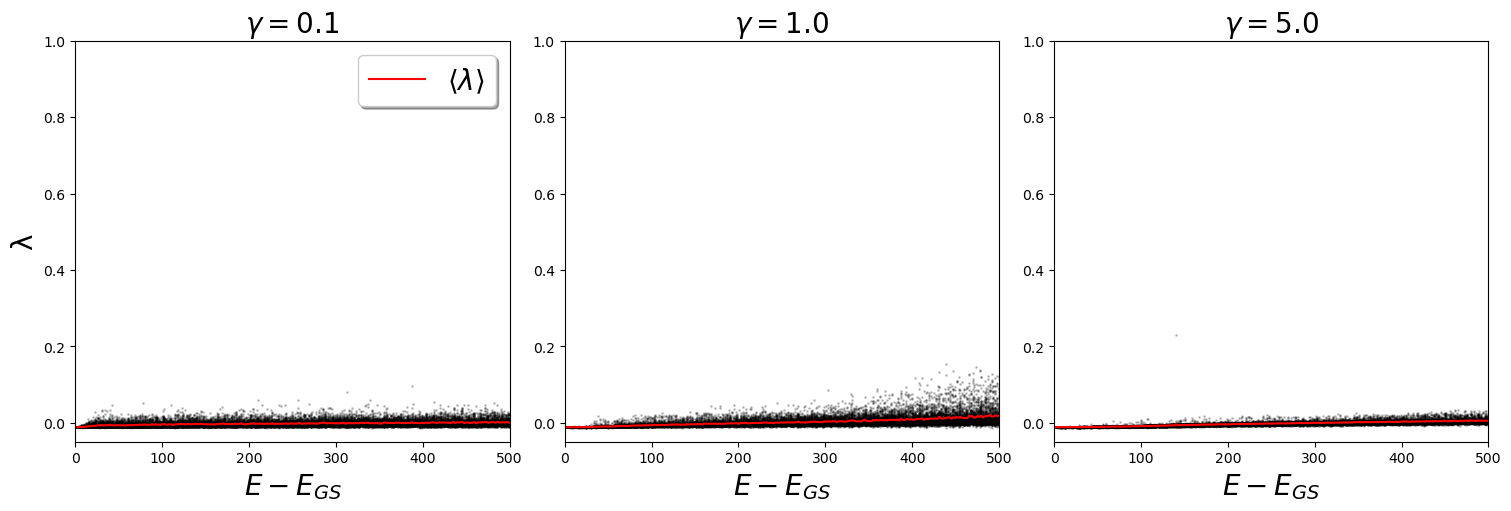

In [41]:
fig = figure(figsize=(15,5), layout= "constrained")
gs = fig.add_gridspec(1,3)
element(i,j) = get(gs, (i,j)) # starts at 0 to N-1
slice(i,j) = pycall(pybuiltin("slice"), PyObject, i,j)
colors_ = ["red", "blue", "green", "orange", "purple", "brown", "pink", "gray", "olive", "cyan"];
markers_ = ["o", "v", "s", "D", "^", "<", ">", "p", "*", "h"];
xx_lim = 500
font_label = 20


Δ1, K1, ξ11, ξ21, Δ2, K2, ξ12, ξ22, κ1, κ2 =  0., 1., 0., 5., 0., 1., 0., 5., 0.025, 0.025;
ps = [0.1, 1., 5.]
ICs = 100


#Lyapunov exponent
#Lyapunov exponent
for j in 1:3
    ax = fig.add_subplot(element(0,j-1))
    p = Δ1, K1, ξ11, ξ21, Δ2, K2, ξ12, ξ22, ps[j], κ1, κ2;

    roots, cE, λs_p31, s_λ = closed_crit_energies(p,6);
    n_E = 300
    Es1 = range(cE[1],600+cE[1], length=n_E)
    println( cE[1] )
    Energies = Es1 .- cE[1] 
    λ_mean = zeros(n_E)
    λs= load("../data/Lyapunov_open/Lyapunov_Energies_$(p)_ICs_$(ICs)_open.jld")["λs"] 
    println("γ = $(ps[j])")
    
    
    
    for i in 1:length(λs)
        scatter(range(Energies[i], Energies[i], length=length(λs[i])), λs[i], color="black", alpha=0.2,s=1);
        λ_mean[i] = mean(λs[i])
    end

    plot(Energies, λ_mean, "-", color="red", markersize=5, label = L"⟨λ⟩");
    title(L"γ = %$(ps[j])", fontsize=font_label)
    #ax.text(.03, 0.85, L"γ = %$(ps[j])", transform=ax.transAxes, fontsize=20, verticalalignment="top")
    if j ==1
        legend(fontsize=20, shadow=true, loc = "upper right");
    end

    if j ==1
        ylabel("λ", fontsize = font_label)
        #yticks([0, 4, 8], fontsize=15)
        #xlim(0, 130)
        #ylim(-.05, 3.5)
    else
        #yticks([])
    end
    xlim(-0.05, xx_lim)
    ylim(-.05, 1.0)
    xlabel(L"E - E_{GS}", fontsize = font_label)
end

